In [28]:
import cv2
import pytesseract
import numpy as np
import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import time
import requests
import difflib
import json
import pickle

In [24]:
!ls ../sshfs/frankjem

cmp_franklin_d1_0.ts  cmp_franklin_d2_1.ts  cmp_jemison_d2_1.ts
cmp_franklin_d1_1.ts  cmp_jemison_d1_0.ts   lost+found
cmp_franklin_d2_0.ts  cmp_jemison_d2_0.ts


In [25]:
%load_ext autoreload
%autoreload 2
from matchinator import pass1, pass2, util
from matchinator.pass1 import Pass1EventData, Pass1EventMatch
from ftcevents import FTCEventsClient

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#ftcev = FTCEventsClient
with open("token.json") as f:
    ftcev_token = json.load(f)
ftcev = FTCEventsClient(ftcev_token['username'], ftcev_token['token'])


In [36]:
!pwd

In [53]:
fname = "cmp_franklin_elims"
event_matches = pass1.run(f"../cropped/{fname}.ts")
pass1_pkl = f"pkl/{fname}_pass1.pkl"
with open(pass1_pkl, "wb") as f:
    pickle.dump(event_matches, f)

In [54]:
event_matches

Pass1EventData(fps=29, width=1920, height=1080, matches=[Pass1EventMatch(name='Semifinal 1 Match 1', top=False, frame_idx=17719, video_sec=591.2230000000001, is_tele=False, match_ts=30, red_teams=('12993', '19746', '8393'), blue_teams=('(16236', '(9889', '(16379'), is_replay=None, colors_flipped=False), Pass1EventMatch(name='Semifinal 1 Match 1', top=False, frame_idx=17748, video_sec=592.191, is_tele=False, match_ts=30, red_teams=('12993', '19746', '8393'), blue_teams=('(16236', '(9889', '(16379'), is_replay=None, colors_flipped=False), Pass1EventMatch(name='Semifinal 1 Match 1', top=False, frame_idx=17777, video_sec=593.159, is_tele=False, match_ts=30, red_teams=('12993', '19746', '8393'), blue_teams=('(16236', '(9889', '(16379'), is_replay=None, colors_flipped=False), Pass1EventMatch(name='Semifinal 1 Match 1', top=False, frame_idx=17806, video_sec=594.126, is_tele=False, match_ts=30, red_teams=('12993', '19746', '8393'), blue_teams=('(16236', '(9889', '(16379'), is_replay=None, colo

In [55]:
#imshow_bgr(d.frame)
#with open(pass1_pkl, "rb") as f:
#    event_matches = pickle.load(f)
all_matches = pass2.combine_matches(event_matches)

In [56]:
#imshow_bgr(d.match_display)
#all_matches[0].top
import time
def clean_teams(alliance):
    return ", ".join(a.rstrip(")").lstrip("(") for a in alliance)
for m in all_matches:
    strtimestamp = time.strftime("%H:%M:%S", time.gmtime(m.start_ts))
    line = " ".join([m.name, "---", clean_teams(m.red_teams), "vs.", clean_teams(m.blue_teams)])
    print(strtimestamp, line)

00:09:57 Semifinal 1 Match 1 --- 16236, 9889, 16379 vs. 12993, 19746, 8393
00:19:40 Semifinal 2 Match 1 --- 22312, 8680, 8365 vs. 10544, 19044, 12635
00:27:16 Semifinal 1 Match 2 --- 16236, 9889, 16379 vs. 12993, 19746, 8393
00:36:42 Semifinal 2 Match 2 --- 22312, 8680, 8365 vs. 10544, 19044, 12635
01:17:26 Finals Match 1 --- 22312, 8680, 8365 vs. 16236, 9889, 16379
01:37:16 Finals Match 2 --- 16236, 9889, 16379 vs. 22312, 8680, 8365
01:56:54 Finals Match 3 --- 22312, 8680, 8365 vs. 16236, 9889, 16379


In [57]:
# Use FTC-Events data to fix the schedule
schedule = ftcev.get_schedule("FTCCMP1FRAN")
for m in all_matches:
    strtimestamp = time.strftime("%H:%M:%S", time.gmtime(m.start_ts))
    closest_match = difflib.get_close_matches(m.name, schedule.keys())[0]
    print(strtimestamp, schedule[closest_match]['matchSummary'])


00:09:57 Semifinal 1 Match 1 --- 12993, 19746, 8393 vs. 16236, 9889, 16379 -- 235-276 B
00:19:40 Semifinal 2 Match 1 --- 10544, 19044, 12635 vs. 22312, 8680, 8365 -- 197-247 B
00:27:16 Semifinal 1 Match 2 --- 12993, 19746, 8393 vs. 16236, 9889, 16379 -- 193-194 B
00:36:42 Semifinal 2 Match 2 --- 10544, 19044, 12635 vs. 22312, 8680, 8365 -- 150-290 B
01:17:26 Finals Match 1 --- 16236, 9889, 16379 vs. 22312, 8680, 8365 -- 234-244 B
01:37:16 Finals Match 2 --- 16236, 9889, 16379 vs. 22312, 8680, 8365 -- 214-191 R
01:56:54 Finals Match 3 --- 16236, 9889, 16379 vs. 22312, 8680, 8365 -- 230-238 B


In [26]:
difflib.get_close_matches("Qualification 3 of 132 --- 23114 vs. 23114", schedule.keys())

['Qualification 3 of 132 --- 207, 23114 vs. 22508, 14361',
 'Qualification 13 of 132 --- 23114, 10949 vs. 11468, 724',
 'Qualification 34 of 132 --- 16671, 3409 vs. 16410, 23114']

In [155]:
d.tl, d.br

((3, 822), (266, 886))

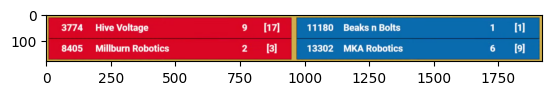

In [157]:
imshow_bgr(d.frame[d.br[1]:d.br[1] + int(180 * d.scaley), :, :])

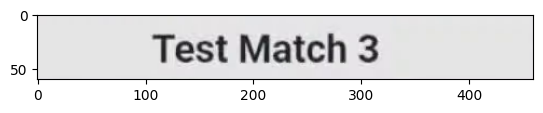

In [175]:
match_name = util.extract_match_name(frame, d.match_tlbr, d.params)
imshow_bgr(match_name)

In [182]:
print(util.extract_text(d.match_display[:, 485:645]))

3774
8405



In [24]:
cap_matcher = matchers.PPCapMatcher(params)

In [40]:
full_caps = cv2.imread("../templates/all_caps.png")
#full_caps_gray = cv2.cvtColor(full_caps, cv2.COLOR_BGR2GRAY)
full_caps_match = full_caps[75:, :, :]

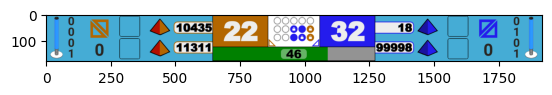

In [41]:
plt.imshow(full_caps_match)

In [42]:
res = cap_matcher.exists(full_caps_match, params)
res

(True, 0.7942609, 0.8098519)

In [49]:
#plt.imshow(res.right_win)
#params.MATCH_CAP_RIGHT_OFFSET

util.extract_match_time(full_caps_match, False, params)

('46',
 array([[[  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0],
         ...,
         [  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0]],
 
        [[  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0],
         ...,
         [  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0]],
 
        [[  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0],
         ...,
         [  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0]],
 
        ...,
 
        [[  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0],
         ...,
         [  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0]],
 
        [[  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0],
         ...,
         [  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0]],
 
        [[  0, 128,   0],
         [  0, 128,   0],
         [  0, 128,   0],
         ...,
         [  0, 128,  

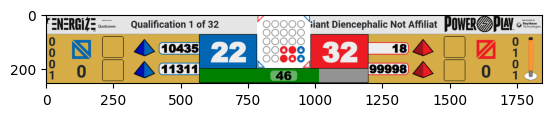

In [37]:
imshow_bgr(full_caps_match)

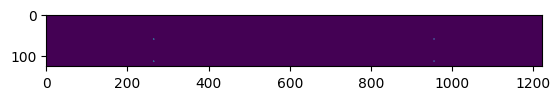

In [208]:
plt.imshow(res > 0.7)

In [209]:
match_display = d.match_display

[autoreload of matchinator.matchers failed: Traceback (most recent call last):
  File "/disk/guinea/first/rc/proj/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/disk/guinea/first/rc/proj/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "/disk/guinea/first/rc/proj/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 381, in update_generic
    update(a, b)
  File "/disk/guinea/first/rc/proj/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 333, in update_class
    if update_generic(old_obj, new_obj):
  File "/disk/guinea/first/rc/proj/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 381, in update_generic
    update(a, b)
  File "/disk/guinea/first/rc/proj/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 293, in u

In [52]:
event_matches

Pass1EventData(fps=30, width=1920, height=1080, matches=[Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14400, video_sec=480000.0, is_tele=False, match_ts='30'), Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14430, video_sec=481000.0, is_tele=False, match_ts='30'), Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14460, video_sec=482000.0, is_tele=False, match_ts='30'), Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14490, video_sec=483000.0, is_tele=False, match_ts='30'), Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14520, video_sec=484000.0, is_tele=False, match_ts='30'), Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14550, video_sec=485000.0, is_tele=False, match_ts='30'), Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14580, video_sec=486000.0, is_tele=False, match_ts='30'), Pass1EventMatch(name='Test Match 3', top=False, frame_idx=14610, video_sec=487000.0, is_tele=False, match_ts='30'), Pass1EventMatch

In [55]:
import dataclasses
import pandas as pd

In [62]:
pd.DataFrame(dataclasses.asdict(event_matches)['matches']).to_csv("csv/nj_matches_rewin.csv")

In [10]:
event_matches.matches[-1]

Pass1EventMatch(name='Qualification 17 of 17', top=False, frame_idx=267720, video_sec=8923.999, is_tele=True, match_ts=0, red_teams=('13302', '4890'), blue_teams=('8405:', '7959'), is_replay=None, colors_flipped=True)

In [13]:
groups1 = pass2.coalese_groups(event_matches.matches)

In [15]:
groups1[-1]

[Pass1EventMatch(name='Qualification 16 of 17', top=False, frame_idx=247170, video_sec=8238.999, is_tele=False, match_ts=30, red_teams=('5573', '16557'), blue_teams=('12968;', '3415'), is_replay=None, colors_flipped=True),
 Pass1EventMatch(name='Qualification 16 of 17', top=False, frame_idx=247200, video_sec=8239.999, is_tele=False, match_ts=29, red_teams=('5573', '16557'), blue_teams=('12968', '3415'), is_replay=None, colors_flipped=True),
 Pass1EventMatch(name='Qualification 16 of 17', top=False, frame_idx=247230, video_sec=8240.999, is_tele=False, match_ts=28, red_teams=('5573', '16557'), blue_teams=('12968', '3415'), is_replay=None, colors_flipped=True),
 Pass1EventMatch(name='Qualification 16 of 17', top=False, frame_idx=247260, video_sec=8241.999, is_tele=False, match_ts=27, red_teams=('5573', '16557'), blue_teams=('12968', '3415'), is_replay=None, colors_flipped=True),
 Pass1EventMatch(name='Qualification 16 of 17', top=False, frame_idx=247290, video_sec=8242.999, is_tele=False,

In [2]:
import av

In [3]:
container = av.open("tmp/nj.webm")

In [4]:
container

<av.InputContainer 'tmp/nj.webm'>

In [7]:
video = container.streams.video[0]
video

<av.VideoStream #0 vp9, yuv420p 1920x1080 at 0x7f49fdb24360>

In [9]:
video.time_base

Fraction(1, 1000)

In [12]:
float(container.duration * video.time_base)

9155321.0